Found something on ML done in my second year

# Classification Task

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [ ]:
data = np.load('2041025_face.npz')
X_train = data['X_train']
y_train = data['y_train']
X_valid = data['X_valid']
y_valid = data['y_valid']
X_test = data['X_test']
y_test = data['y_test']

In [ ]:
X_train

array([[100,  96,  92, ...,   2,  14,   8],
       [ 56,  93,  96, ...,  10,  13,  10],
       [ 97, 101, 104, ..., 150,  86,  16],
       ...,
       [145, 161, 172, ..., 127,  42,  87],
       [148, 166, 177, ..., 185, 185,  74],
       [136, 155, 165, ..., 123, 145, 143]])

In [ ]:
y_train

array([0, 0, 1, ..., 0, 0, 0])

## 1.2

Exploratory Data Analysis Tasks

### 1.2.1

In [ ]:
emotion_zero = np.argwhere(y_train == 0)
emotion_one = np.argwhere(y_train == 1)
emotion_two = np.argwhere(y_train == 2)

In [ ]:
image_zero = X_train[emotion_zero[int(np.random.rand()*len(emotion_zero[:-2]))]]
image_one = X_train[emotion_one[0]]
image_two = X_train[emotion_two[0]]
image_size = int(np.sqrt(image_zero[0].shape[0]))

image_zero = np.reshape(image_zero, newshape=(image_size, image_size))
image_two = np.reshape(image_two, newshape=(image_size, image_size))
image_one = np.reshape(image_one, newshape=(image_size, image_size))

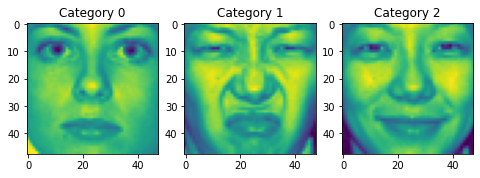

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize=(8, 8), ncols=3)
axs[0].imshow(image_zero)
axs[0].set_title("Category 0")
axs[1].imshow(image_one)
axs[1].set_title("Category 1")
axs[2].imshow(image_two)
axs[2].set_title("Category 2")
plt.show()

In [ ]:
def reshape_images(X, indices):
    reshaped_images = []
    for i in indices:
        image = np.reshape(X[i], newshape=(image_size, image_size))
        reshaped_images.append(image)
    return np.array(reshaped_images)

In [ ]:
emotion_zero_train = reshape_images(X_train, np.argwhere(y_train == 0))
emotion_one_train = reshape_images(X_train, np.argwhere(y_train == 1))
emotion_two_train = reshape_images(X_train, np.argwhere(y_train == 2))

emotion_zero_valid = reshape_images(X_valid, np.argwhere(y_valid == 0))
emotion_one_valid = reshape_images(X_valid, np.argwhere(y_valid == 1))
emotion_two_valid = reshape_images(X_valid, np.argwhere(y_valid == 2))

emotion_zero_test = reshape_images(X_test, np.argwhere(y_test == 0))
emotion_one_test = reshape_images(X_test, np.argwhere(y_test == 1))
emotion_two_test = reshape_images(X_test, np.argwhere(y_test == 2))

### 1.2.2

In [ ]:
from collections import Counter
labels = np.append(y_train, values=[*y_test, *y_valid])
#labels = np.array([str(i) for i in labels])
labels = Counter(labels)
labels
list(labels.values())

[1202, 457, 758]

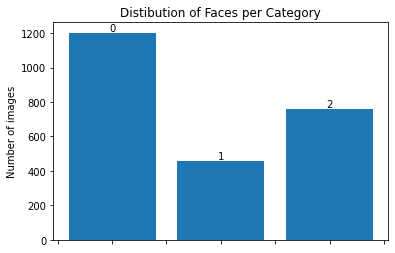

In [ ]:
fig,ax = plt.subplots(1)
vals = list(labels.values())
ax.bar(labels.keys(), labels.values())
ax.set_xticklabels([])
for i in range(0, 3):
    ax.annotate(str(i), xy=(i, vals[i]), ha='center', va='bottom')
plt.title("Distibution of Faces per Category")
plt.ylabel("Number of images")
plt.show()


## 1.3

Classification Tasks

### 1.3.1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train, y_train)
accuracy = knn_1.score(X_valid, y_valid)
accuracy

0.746938775510204

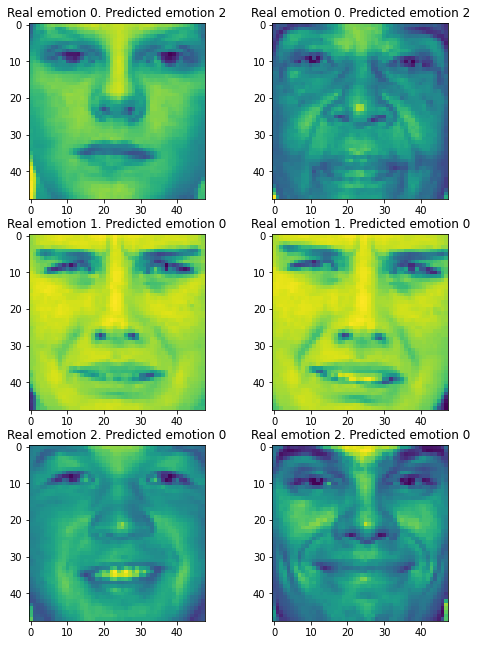

In [ ]:
pred_labels = knn_1.predict(X_test)
missclassified_indices = np.argwhere(y_test!=pred_labels)
m, u, r = 0, 0, 0
fig, axs = plt.subplots(figsize=(8, 11), nrows=3, ncols=2)
for i, indx in enumerate(missclassified_indices):
    image = np.reshape(X_test[indx], newshape=(image_size, image_size))
    if y_test[indx][0] == 0 and m < 2:
        axs[0][m].imshow(image)
        axs[0][m].set_title("Real emotion {}. Predicted emotion {}".format(y_test[indx][0], pred_labels[indx][0]))
        m+=1
    if y_test[indx][0] == 1 and u < 2:
        axs[1][u].imshow(image)
        axs[1][u].set_title("Real emotion {}. Predicted emotion {}".format(y_test[indx][0], pred_labels[indx][0]))
        u += 1
    if y_test[indx][0] == 2 and r < 2:
        axs[2][r].imshow(image)
        axs[2][r].set_title("Real emotion {}. Predicted emotion {}".format(y_test[indx][0], pred_labels[indx][0]))
        r += 1

plt.show()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       122
           1       0.68      0.42      0.52        40
           2       0.84      0.73      0.78        64

    accuracy                           0.78       226
   macro avg       0.77      0.70      0.72       226
weighted avg       0.78      0.78      0.77       226



### 1.3.2

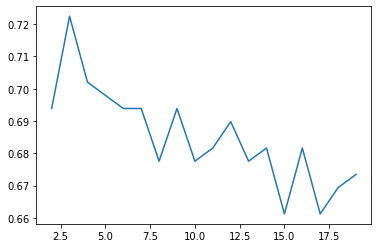

In [ ]:
ks = []
for k in range(2, 20):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    new_accuracy = knn.score(X_valid, y_valid)
    ks.append(new_accuracy)
plt.plot(range(2, 20), ks)

In [ ]:
l = range(2, 20)
max_k = l[np.argmax(ks)]
ks[max_k-1] # second to the largests

0.7020408163265306

In [ ]:
knn_best = KNeighborsClassifier(n_neighbors=max_k-1).fit(X_train, y_train)
y_predict = knn_best.predict(X_test)
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       122
           1       0.71      0.38      0.49        40
           2       0.93      0.59      0.72        64

    accuracy                           0.77       226
   macro avg       0.79      0.65      0.69       226
weighted avg       0.79      0.77      0.75       226



### 1.3.3

In [ ]:
#resampling the data
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(replacement=False)
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = undersample.fit_resample(X_test, y_test)
X_valid_resampled, y_valid_resampled = undersample.fit_resample(X_valid, y_valid)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
accuracy = 0
best_e = 0
mnb = MultinomialNB().fit(X_train_resampled, y_train_resampled)
acc = mnb.score(X_valid_resampled, y_valid_resampled)
acc

0.7555555555555555

In [ ]:
y_predict = mnb.predict(X_test)
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.78      0.83       122
           1       0.44      0.70      0.54        40
           2       0.79      0.70      0.74        64

    accuracy                           0.74       226
   macro avg       0.71      0.73      0.71       226
weighted avg       0.79      0.74      0.76       226



In [ ]:
from sklearn.neural_network import MLPClassifier
from itertools import product
accuracy = 0
hp = (..., ...)
for solver, alpha in product(['lbfgs', 'sgd', 'adam'], np.arange(0.0001, 0.01, 0.0005)):
    MLP = MLPClassifier(solver=solver, alpha=alpha, max_iter=500).fit(X_train, y_train)
    acc = MLP.score(X_valid_resampled, y_valid_resampled)
    if acc == accuracy:
        break
    elif acc > accuracy:
        hp = (solver, alpha)
        accuracy = acc
print(accuracy)

0.8888888888888888


In [ ]:
hp

('adam', 0.006600000000000001)

In [ ]:
MLP = MLPClassifier(solver=hp[0], alpha=hp[1], max_iter=500).fit(X_train, y_train)
y_predict = MLP.predict(X_test)
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       122
           1       0.65      0.75      0.70        40
           2       0.84      0.81      0.83        64

    accuracy                           0.85       226
   macro avg       0.80      0.82      0.81       226
weighted avg       0.85      0.85      0.85       226



In [ ]:
from sklearn.linear_model import LogisticRegression
hp = (..., ...)
accuracy = 0
for solver, c in product(['lbfgs', 'sag', 'saga'], np.arange(0.01, 1.2, 0.05)):
    lr = LogisticRegression(solver=solver, C=c, max_iter=500, multi_class='multinomial').fit(X_train_resampled, y_train_resampled)
    acc = lr.score(X_valid_resampled, y_valid_resampled)
    if acc == accuracy:
        break
    elif acc > accuracy:
        hp = (solver, c)
        accuracy = acc
print(accuracy)

0.8814814814814815


In [ ]:
hp

('sag', 0.01)

In [ ]:
lr = LogisticRegression(solver=hp[0], C=hp[1], max_iter=500, multi_class='multinomial').fit(X_train_resampled, y_train_resampled)
y_predict = lr.predict(X_test_resampled)
report = classification_report(y_test_resampled, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.95      0.90      0.92        40
           2       0.90      0.93      0.91        40

    accuracy                           0.91       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.91      0.91      0.91       120



In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.00000000000001).fit(X_train_resampled, y_train_resampled)
acc = tree.score(X_valid_resampled, y_valid_resampled)
print(acc)

0.6962962962962963


In [ ]:
y_predict = tree.predict(X_test_resampled)
report = classification_report(y_test_resampled, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.66      0.68      0.67        40
           1       0.57      0.57      0.57        40
           2       0.62      0.60      0.61        40

    accuracy                           0.62       120
   macro avg       0.62      0.62      0.62       120
weighted avg       0.62      0.62      0.62       120



In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train_resampled)
X_test_reduced = pca.fit_transform(X_test_resampled)
X_valid_reduced = pca.fit_transform(X_valid_resampled)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
hp = ...
accuracy = 0
for lrate in np.arange(0.01, 5, 0.5):
    gbc = GradientBoostingClassifier(loss='deviance', learning_rate=lrate).fit(X_train_reduced, y_train_resampled)
    acc = gbc.score(X_valid_reduced, y_valid_resampled)
    if acc > accuracy:
        hp = lrate
        accuracy = acc

In [ ]:
hp

0.01

In [ ]:
gbc = GradientBoostingClassifier(loss='deviance', learning_rate=hp).fit(X_train_reduced, y_train_resampled)
y_predict = gbc.predict(X_test_reduced)
report = classification_report(y_test_resampled, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.44      0.28      0.34        40
           1       0.35      0.70      0.46        40
           2       0.14      0.05      0.07        40

    accuracy                           0.34       120
   macro avg       0.31      0.34      0.29       120
weighted avg       0.31      0.34      0.29       120



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
mnb_pip = Pipeline([
    ('scaler', MinMaxScaler()),
    ('multinomial', MultinomialNB())
])
mlp = MLPClassifier(solver = 'lbfgs', alpha = 0.0036, max_iter=1000)
logreg = LogisticRegression(solver='lbfgs', C=0.060000000000000005, multi_class='multinomial')
dtree = DecisionTreeClassifier(criterion='entropy', ccp_alpha=1e-14)

In [ ]:
from sklearn.ensemble import VotingClassifier

classifiers = [('mnb_pip', mnb_pip), ('mlp', mlp), ('logreg', logreg), ('dtree', dtree)]
vc = VotingClassifier(estimators=classifiers, voting='soft').fit(X_train_resampled, y_train_resampled)

In [ ]:
y_predict = vc.predict(X_test_resampled)
report = classification_report(y_test_resampled, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        40
           1       0.91      0.75      0.82        40
           2       0.72      0.90      0.80        40

    accuracy                           0.81       120
   macro avg       0.82      0.81      0.81       120
weighted avg       0.82      0.81      0.81       120



# Regression Task

In [ ]:
import pandas as pd

data_kanga = np.transpose(pd.read_csv("kanga.csv").to_numpy())
data_nose = np.transpose(pd.read_csv("2041025_nose.csv").drop("Unnamed: 0", axis='columns').to_numpy())

In [ ]:
data_kanga

array([[609, 629, 620, 564, 645, 493, 606, 660, 630, 672, 778, 616, 727,
        810, 778, 823, 755, 710, 701, 803, 855, 838, 830, 864, 635, 565,
        562, 580, 596, 597, 636, 559, 615, 740, 677, 675, 629, 692, 710,
        730, 763, 686, 717, 737, 816],
       [241, 222, 233, 207, 247, 189, 226, 240, 215, 231, 263, 220, 271,
        284, 279, 272, 268, 278, 238, 255, 308, 281, 288, 306, 236, 204,
        216, 225, 220, 219, 201, 213, 228, 234, 237, 217, 211, 238, 221,
        281, 292, 251, 231, 275, 275]])

## 2.2

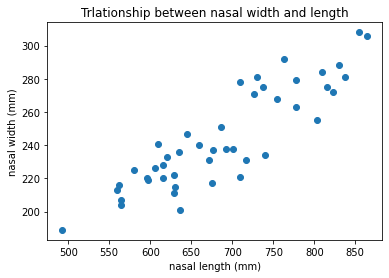

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data_kanga[0], data_kanga[1])
plt.xlabel("nasal length (mm)")
plt.ylabel("nasal width (mm)")
plt.title("Trlationship between nasal width and length")
plt.show()

## 2.3

Regression Tasks

### 2.3.1

In [ ]:
from sklearn.model_selection import train_test_split
X, y = data_kanga[0].reshape(-1, 1), data_kanga[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### 2.3.2

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linearReg = LinearRegression().fit(X_train, y_train)
pred_y = linearReg.predict(X_test)

r2_score(y_test, pred_y)

0.7050779023623299

### 2.3.3

In [ ]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1]).fit(X_train, y_train)
pred_y = ridge_cv.predict(X_test)

r2_score(y_test, pred_y)


0.7050773481368704

### 2.3.4

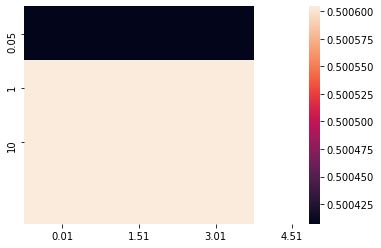

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import numpy as np
import seaborn as sns
svr = SVR(kernel='linear')
parameters= {'C':np.arange(0.01, 5.5, 1.5), 'gamma':[0.05, 1, 10]}
reg_svr = GridSearchCV(svr, parameters).fit(X_train, y_train)
best_index = reg_svr.cv_results_["rank_test_score"][0] - 1
best_params = reg_svr.cv_results_["params"]
scores = reg_svr.cv_results_['mean_test_score'].reshape(4, 3)
sns.heatmap(scores, yticklabels=parameters['gamma'], xticklabels=parameters['C'])

In [ ]:
best_model = best_params[best_index]
best_model

{'C': 4.51, 'gamma': 0.05}

In [ ]:
best_svr = SVR(C=best_model['C'], gamma=best_model['gamma']).fit(X_train, y_train)
pred_y = best_svr.predict(X_test)
r2_score(y_test, pred_y)

0.13877674397892903

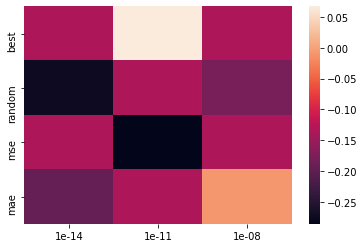

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
dtreer = DecisionTreeRegressor()
parameters= {'splitter':['best', 'random'], 'criterion':['mse', 'mae'], 'ccp_alpha':[1e-14, 1e-11, 1e-8]}
reg_dtree = GridSearchCV(dtreer, parameters).fit(X_train, y_train)
reg_dtree.cv_results_["rank_test_score"]
best_index = reg_dtree.cv_results_["rank_test_score"][0] - 1
best_params = reg_dtree.cv_results_["params"]
scores = reg_dtree.cv_results_['mean_test_score'].reshape(4, 3)
sns.heatmap(scores, xticklabels=parameters['ccp_alpha'], yticklabels=parameters['splitter']+parameters['criterion'])

In [ ]:
best_model = best_params[best_index]
best_model

{'ccp_alpha': 1e-14, 'criterion': 'mae', 'splitter': 'best'}

In [ ]:
best_dtreer = DecisionTreeRegressor(splitter=best_model['splitter'], criterion=best_model['criterion'], ccp_alpha=best_model['ccp_alpha']).fit(X_train, y_train)
pred_y = best_dtreer.predict(X_test)
r2_score(y_test, pred_y)

0.5712829419315865

## 2.4

In [ ]:
from sklearn.impute import SimpleImputer
X, y = data_nose[0].reshape(-1, 1), data_nose[1]
X_new = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(X)
y_new = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(y.reshape(-1, 1))

In [ ]:
y_new.reshape(1, -1)[0]

array([241.        , 222.        , 233.        , 207.        ,
       247.        , 189.        , 226.        , 240.        ,
       215.        , 231.        , 263.        , 220.        ,
       271.        , 284.        , 279.        , 272.        ,
       268.        , 278.        , 238.        , 255.        ,
       308.        , 281.        , 288.        , 306.        ,
       236.        , 204.        , 216.        , 225.        ,
       220.        , 219.        , 201.        , 213.        ,
       228.        , 234.        , 237.        , 217.        ,
       211.        , 238.        , 221.        , 281.        ,
       292.        , 251.        , 231.        , 275.        ,
       275.        , 244.36170213, 244.36170213, 202.        ,
       296.        , 244.36170213, 244.36170213])

In [ ]:
linearReg = LinearRegression().fit(X_new, y_new.reshape(1, -1)[0])
pred_y = linearReg.predict(X_test)
r2_score(y_test, pred_y)

0.677514796416723

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor
X_new = KNNImputer(n_neighbors=3).fit_transform(X)
y_new = KNNImputer(n_neighbors=3).fit_transform(y.reshape(-1, 1))
knnReg = KNeighborsRegressor(3).fit(X_new, y_new.reshape(1, -1)[0])
pred_y = knnReg.predict(X_test)
r2_score(y_test, pred_y)

0.9307181152306878